In [76]:
import pandas as pd
import numpy as np
import glob
from os import path as op
import os
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()


In [71]:
#bad_subjs = ["T060","C024","T031"]
location = glob.glob("Z:/elekin/02-RESULTADOS/output/preproc/cbl/*/cbl_extracted_ts.csv")
files = list(filter(lambda x: not any(subj in x for subj in bad_subjs),location))
shape = [N,158,28]
timeseries = []
for i, f in enumerate (files):
    #print(i,f)
    df = pd.read_csv(f, header=None)
    df['id'] = f[43: 47]
    df['label'] = 1 if 'C' in f else 0
    #print(df.shape)
    timeseries.append(df)
frame = pd.concat(timeseries, ignore_index=False)

In [72]:
frame

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,id,label
0,-0.002520,0.013222,-0.004940,0.003371,-0.042581,-0.050001,-0.021766,-0.013187,-0.321326,-0.010947,...,-0.007681,-0.025308,-0.006958,0.013730,-0.021474,0.014184,0.002166,0.077473,C280,1
1,0.020288,0.007478,-0.019503,-0.014856,-0.022353,-0.038423,-0.021758,-0.013593,-0.296442,-0.009361,...,0.027909,-0.003768,0.008915,-0.004031,-0.022702,-0.022703,0.020545,-0.059880,C280,1
2,0.021849,0.031383,-0.008738,0.008477,-0.007785,0.002403,-0.006269,-0.018415,-0.046055,-0.004564,...,-0.005600,-0.000554,0.013976,-0.009157,0.005542,0.030026,0.040067,0.030955,C280,1
3,0.007500,0.001140,-0.013854,-0.015423,-0.024950,-0.056925,-0.016674,-0.026915,0.133077,-0.012509,...,-0.010788,-0.008974,-0.015698,-0.029032,-0.004387,-0.020743,-0.004155,0.062465,C280,1
4,0.012683,-0.018636,0.008754,0.007224,0.003991,-0.014238,0.002057,0.000371,0.374981,0.000694,...,-0.012475,0.016495,0.004425,-0.026843,0.020540,-0.000033,-0.006946,0.030442,C280,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,0.030626,0.024559,0.002019,0.034669,0.017153,-0.003552,0.050472,-0.010637,0.277364,0.046613,...,0.022853,0.020795,0.001440,-0.010447,0.014498,0.054610,-0.020105,0.009890,T059,0
154,0.003590,0.003795,0.014961,-0.007565,0.036529,0.007365,0.032069,0.041519,0.210714,0.051822,...,0.038428,0.018870,-0.004855,0.021948,0.002724,0.016801,-0.017425,-0.006655,T059,0
155,0.018831,0.029452,-0.010764,-0.003148,0.028824,0.030179,0.056112,0.002604,0.323862,-0.024408,...,0.046532,0.007678,0.010613,0.010552,0.019076,0.051188,0.006163,0.005702,T059,0
156,-0.012118,0.026069,-0.008848,0.008615,0.026965,-0.053522,0.036309,-0.042961,0.751244,0.033396,...,0.025468,0.033139,0.015782,-0.046170,0.019616,-0.002520,-0.027619,-0.002025,T059,0


In [73]:
frame.shape

(15484, 30)

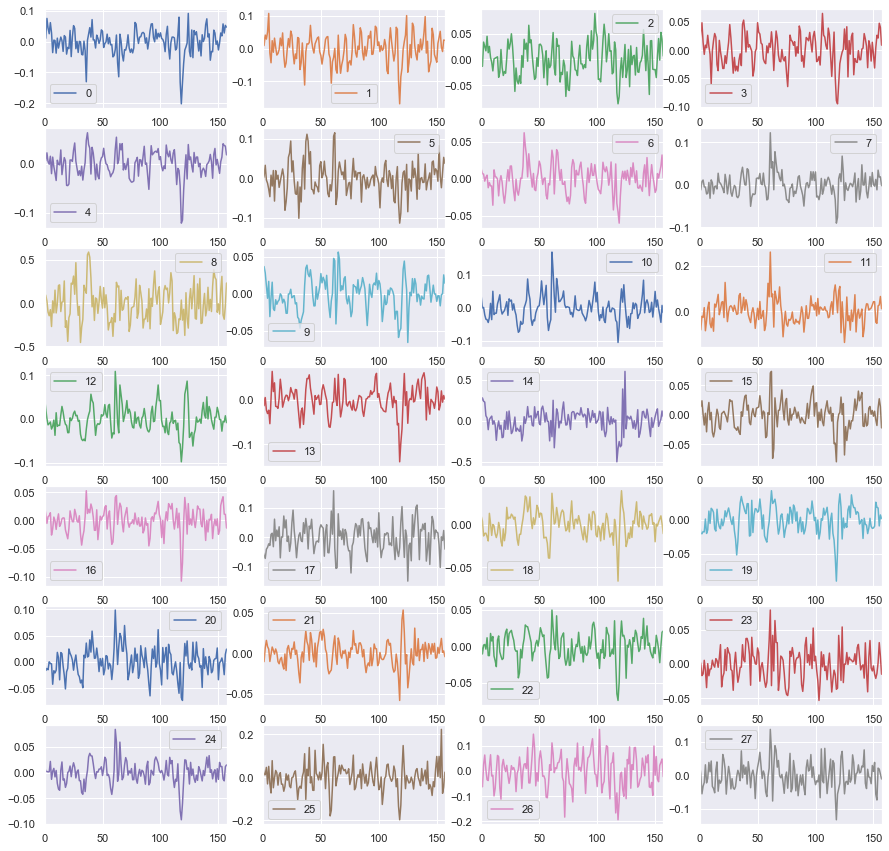

In [102]:
subj = "T027"
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15,15))
df = frame.loc[:,frame.columns != 'label']
p = df[df["id"] == subj].plot(subplots=True, ax=axes, fig=fig)

In [104]:
frame.to_hdf('Z:/elekin/02-RESULTADOS/00-EXTRACCION-CEREBELO/elekin_fmri_ts_pandas.hdf5', 'cbl')

C:\Users\isancmen\AppData\Local\Continuum\anaconda3\envs\pyrestfmri\lib\site-packages\pandas\io\pytables.py:278: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->axis0] [items->None]

  f(store)
